In [1]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import *
from qiskit.visualization import circuit_drawer
from pylatexenc import *
from qiskit_aer.primitives import SamplerV2

In [2]:
circuit = QuantumCircuit(2,2)

In [ ]:
#alternative notation for creating 2 qubits and 2 classical bits
#quantum_register=QuantumRegister(2)
#classical_register=ClassicalRegister(2)
#circuit=QuantumCircuit(quantum_register,classical_register)

In [5]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [7]:
%matplotlib inline

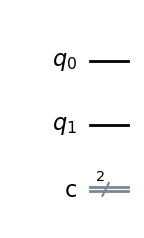

In [9]:
circuit.draw(output="mpl")

In [11]:
circuit.h(0)
#circuit.draw(output='mpl')
circuit.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

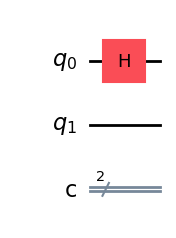

In [13]:
circuit.draw(output='mpl')

In [15]:
circuit.cx(0,1)  # 0 is the control qubit and 1 is the target qubit
circuit.measure([0,1],[0,1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

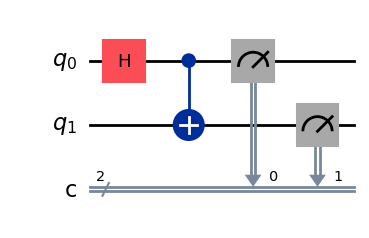

In [17]:
circuit.draw(output='mpl')

## This section is running the circuit on a simulator

In [19]:
sampler = SamplerV2()

In [21]:
job = sampler.run([circuit], shots=1024)

In [23]:
from qiskit.visualization import plot_histogram

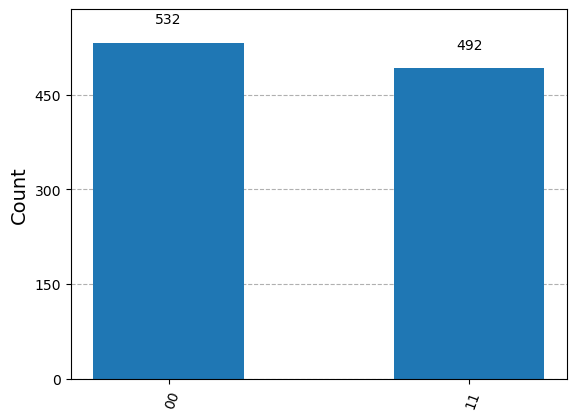

In [25]:
plot_histogram(job.result()[0].data['c'].get_counts())

## This section is working on a real quantum computer

In [27]:
#Please save an IBMApiKey.txt file to the same folder as this notebook to enable your API Key
token = open("IBMApiKey.txt","r").read()
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True, set_as_default=True)

In [29]:
# Load saved credentials
service = QiskitRuntimeService()

In [31]:
backend = service.backend("ibm_kyiv", instance="ibm-q/open/main")

In [33]:
new_circuit=transpile(circuit, backend)

In [37]:
with Session(backend=backend) as session:
    # Submit a request to the Sampler primitive within the session.
    new_sampler = Sampler(mode=session)
    new_job = sampler.run([new_circuit])

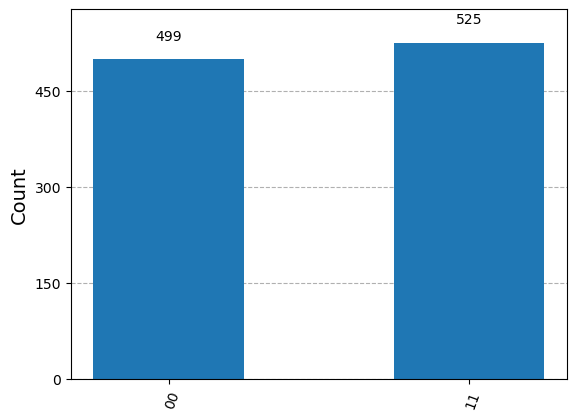

In [39]:
plot_histogram(new_job.result()[0].data['c'].get_counts())